In [217]:
#########################################################################################################################################################
#                                                                                                                                                       #
#                             EMC2 WP 2 Processing 0.1                                                                                                  #
#                             Geopackage and subset preparation                                                                                         #
#                             BD_TOPO (Building and roads),                                                                                             #
#                             Filosofi (population)                                                                                                     #
#                             Author : Perez Joan                                                                                                       #
#                                                                                                                                                       #
#########################################################################################################################################################

In [16]:
import os
import pandas
import geopandas
import time
import contextily
import matplotlib.pyplot as plt

In [3]:
## 1. Download and subset data

# Download last version of BD_TOPO for a given French department
# Webpage : https://geoservices.ign.fr/bdtopo#telechargementgpkgreg
# Côte d'azur department : Dhttps://data.geopf.fr/telechargement/download/BDTOPO/BDTOPO_3-3_TOUSTHEMES_GPKG_LAMB93_R93_2023-12-15/BDTOPO_3-3_TOUSTHEMES_GPKG_LAMB93_R93_2023-12-15.7z

# Download last version of Filosofi (2019 on 23/02/2024)
# https://www.insee.fr/fr/statistiques/7655475?sommaire=7655515

directory_path = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\Raw data\\BDTOPO 3-3\\1_DONNEES_LIVRAISON_2023-12-00207\\BDT_3-3_GPKG_LAMB93_R93-ED2023-12-15"
directory_path2 = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\Raw data\\Filosofi 2019"

# Define the filename
filename = "BDT_3-3_GPKG_LAMB93_R93-ED2023-12-15.gpkg"
filename2 = "carreaux_200m_met.shp"

# Join the directory and filename using os.path.join
file_path = os.path.join(directory_path, filename)
file_path2 = os.path.join(directory_path2, filename2)

In [4]:
# Read the administrative boundaries
start_time = time.time()
administrative = geopandas.read_file(file_path, layer="commune", engine='pyogrio', use_arrow=True)
end_time = time.time()
processing_time = end_time - start_time
print("Import processing time:", processing_time, "seconds")

Import processing time: 0.2683379650115967 seconds


In [5]:
# Read roads
start_time = time.time()
road = geopandas.read_file(file_path, layer="troncon_de_route", engine='pyogrio', use_arrow=True)
end_time = time.time()
processing_time = end_time - start_time
print("Import processing time:", processing_time, "seconds")

Import processing time: 8.911890506744385 seconds


In [6]:
# Read buildings
start_time = time.time()
building = geopandas.read_file(file_path, layer="batiment", engine='pyogrio', use_arrow=True)
end_time = time.time()
processing_time = end_time - start_time
print("Import processing time:", processing_time, "seconds")

Import processing time: 11.89023756980896 seconds


In [7]:
# Read population
start_time = time.time()
population = geopandas.read_file(file_path2, engine='pyogrio', use_arrow=True)
end_time = time.time()
processing_time = end_time - start_time
print("Import processing time:", processing_time, "seconds")

Import processing time: 50.38734555244446 seconds


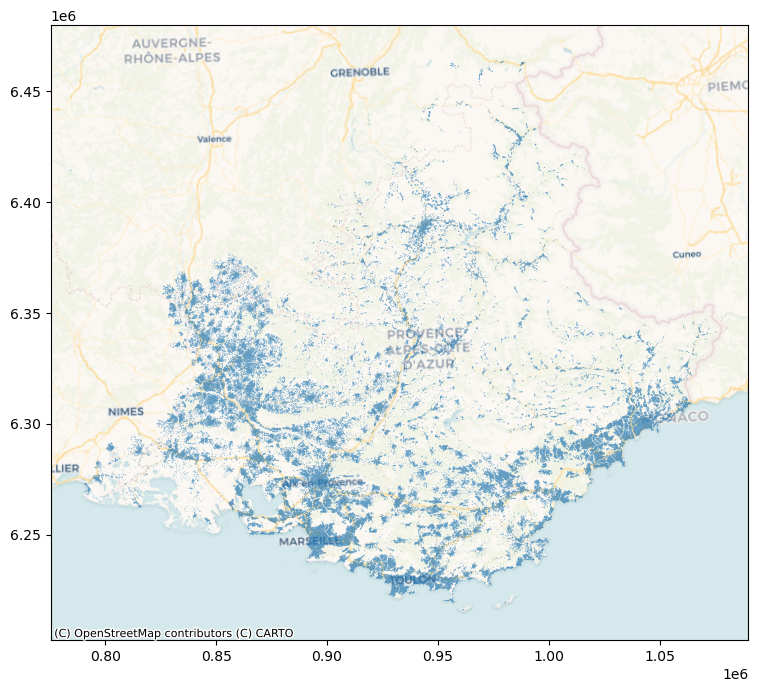

In [9]:
# keep population squares for Côte d'azur only
subset_population = geopandas.sjoin(population, administrative, predicate='within')
subset_population = subset_population.iloc[:, list(range(35))]

# Map to check the subset
ax = subset_population.plot(figsize=(9, 9))
# Add basemap
contextily.add_basemap(
    ax, crs=subset_population.crs, source=contextily.providers.CartoDB.Voyager
)

In [10]:
# Remove some variable with wrong format in BD_TOPO datasets
administrative_clean = administrative.iloc[:, list(range(10)) + list(range(12, 18)) + list(range(20, 26))]
building_clean = building.iloc[:, list(range(7)) + list(range(10, 28))]
road_clean = road.iloc[:, list(range(7)) + list(range(12, 43)) + list(range(45, 85))]

In [ ]:
# if needed : check column names after filter
for index, column_name in enumerate(administrative_clean.columns):
    print(f"Column {index}: {column_name}")

for index, column_name in enumerate(building_clean.columns):
    print(f"Column {index}: {column_name}")

for index, column_name in enumerate(road_clean.columns):
    print(f"Column {index}: {column_name}")

In [226]:
## 2. Create GPKG for Côte d'Azur
# Specify the file path for the GeoPackage file
file_path = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\processing\\EMC2_CA_WP2_bis.gpkg"

# Save the GeoDataFrames to a GeoPackage file
subset_population.to_file(file_path, layer = "population", driver="GPKG")
building_clean.to_file(file_path, layer = "building", driver="GPKG")
road_clean.to_file(file_path, layer = "road", driver="GPKG")
administrative_clean.to_file(file_path, layer = "administrative", driver="GPKG")

In [11]:
## 3. Create subset for Drap commune
administrative_clean = administrative_clean[administrative_clean["nom_officiel"] == "Drap"]

subset_population = geopandas.sjoin(subset_population, administrative_clean, predicate='within')
subset_population = subset_population.iloc[:, list(range(35))]
building_clean = geopandas.sjoin(building_clean, administrative_clean, predicate='within')
building_clean = building_clean.iloc[:, list(range(25))]
road_clean = geopandas.sjoin(road_clean, administrative_clean, predicate='within')
road_clean = road_clean.iloc[:, list(range(78))]

In [243]:
# Record subset on Drap
# Specify the file path for the GeoPackage file
file_path = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\processing\\EMC2_CA_Subset_WP2_bis.gpkg"

# Save the GeoDataFrames to a GeoPackage file
subset_population.to_file(file_path, layer = "population", driver="GPKG")
building_clean.to_file(file_path, layer = "building", driver="GPKG")
road_clean.to_file(file_path, layer = "road", driver="GPKG")
administrative_clean.to_file(file_path, layer = "administrative", driver="GPKG")

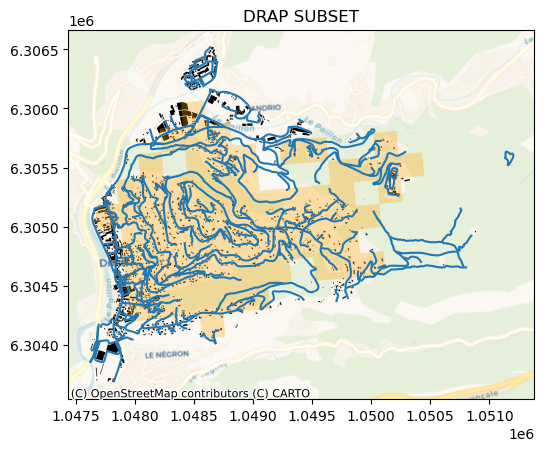

In [18]:
# Create a plot with building_clean
ax = building_clean.plot(color='black')
# Plot road_clean on the same axis
road_clean.plot(ax=ax)
# Plot population on the same axis
ax = subset_population.plot(ax=ax, alpha=0.3, color='orange')
plt.title("DRAP SUBSET")
contextily.add_basemap(ax, crs=subset_population.crs, source=contextily.providers.CartoDB.Voyager)